# AI-MAJOR-NOV  by Siddhartha Sinha (siddharthsinha8@gmail.com)

In [23]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import  Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf

In [24]:
#from zipfile import ZipFile
#file_name = "/content/dataset.zip"

#with ZipFile(file_name, 'r') as zip:
    #zip.extractall()
    #print('Done')


Done


Above snippet is used for google colab.

In [25]:
data_path="dataset"
categories=["without_mask","with_mask"]
label_dict={"without_mask":0,"with_mask":1}
data=[]
target=[]
img_size = 100
print(label_dict)
print(categories)


{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']


In [26]:
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        try:
            img=cv2.imread(img_path)  
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size ,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except:
            print("error")
            pass
        
        
        
        

In [27]:
data=np.array(data)
data=data/255
data=np.reshape(data,(1376, 100, 100))
target=np.array(target)
np.save('data',data)
np.save('target',target)

In [28]:
data=np.load('data.npy')
target=np.load('target.npy')

In [29]:
target=np_utils.to_categorical(target)
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

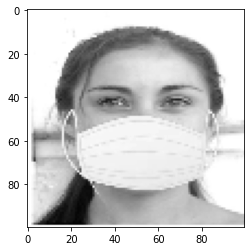

In [30]:
plt.imshow(data[760],cmap='gray')

In [31]:
target[760]

array([0., 1.], dtype=float32)

In [32]:

new_data=[]
for i in data:
    image = i.reshape((*i.shape,1))
    image = tf.convert_to_tensor(image)
    new_data.append(tf.image.grayscale_to_rgb(image))
np.shape(new_data)

(1376, 100, 100, 3)

In [33]:
data = new_data.copy()
np.shape(data)

(1376, 100, 100, 3)

In [34]:
np.shape(target)

(1376, 2)

In [35]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1,shuffle=True)
train_data=np.array(train_data)
test_data=np.array(test_data)

In [37]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1238, 100, 100, 3)
(138, 100, 100, 3)
(1238, 2)
(138, 2)


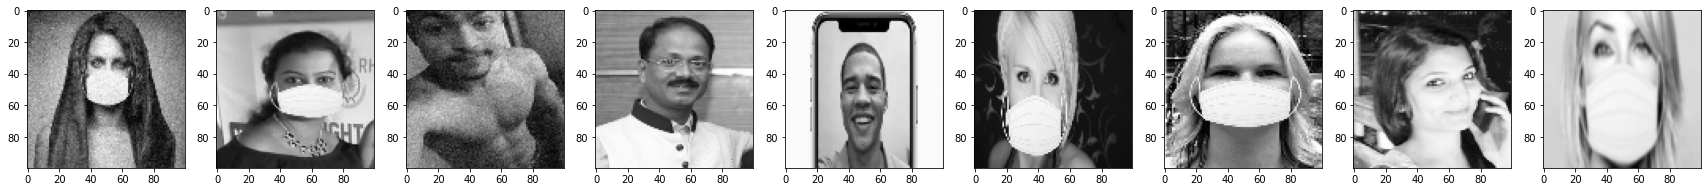

In [38]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(train_data[np.random.randint(0,1238)],cmap='gray')

In [39]:
img_shape = train_data[0].shape
img_shape

(100, 100, 3)

In [40]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

In [42]:
history = model.fit(x=train_data,y=train_target,batch_size=100,epochs=20,validation_split=0.2,verbose=2,shuffle=True)

Epoch 1/20
10/10 - 10s - loss: 1.1403 - accuracy: 0.4697 - val_loss: 0.6938 - val_accuracy: 0.4879
Epoch 2/20
10/10 - 1s - loss: 0.6916 - accuracy: 0.4949 - val_loss: 0.6896 - val_accuracy: 0.4879
Epoch 3/20
10/10 - 1s - loss: 0.6830 - accuracy: 0.4949 - val_loss: 0.6783 - val_accuracy: 0.4879
Epoch 4/20
10/10 - 1s - loss: 0.6648 - accuracy: 0.5424 - val_loss: 0.6610 - val_accuracy: 0.6129
Epoch 5/20
10/10 - 1s - loss: 0.6426 - accuracy: 0.6586 - val_loss: 0.6441 - val_accuracy: 0.6895
Epoch 6/20
10/10 - 1s - loss: 0.6121 - accuracy: 0.7111 - val_loss: 0.6223 - val_accuracy: 0.7177
Epoch 7/20
10/10 - 1s - loss: 0.5865 - accuracy: 0.7455 - val_loss: 0.6001 - val_accuracy: 0.6935
Epoch 8/20
10/10 - 1s - loss: 0.5673 - accuracy: 0.7606 - val_loss: 0.5844 - val_accuracy: 0.7298
Epoch 9/20
10/10 - 1s - loss: 0.5375 - accuracy: 0.8121 - val_loss: 0.5691 - val_accuracy: 0.7258
Epoch 10/20
10/10 - 1s - loss: 0.5168 - accuracy: 0.8232 - val_loss: 0.5138 - val_accuracy: 0.8427
Epoch 11/20
10/10 

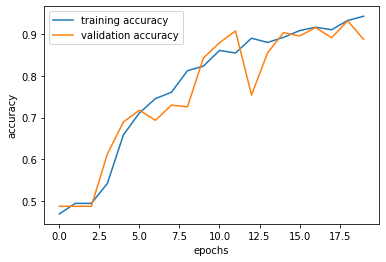

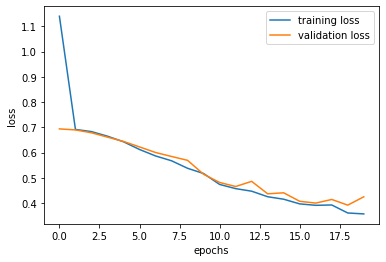

In [43]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [44]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 26ms/step - loss: 0.4273 - accuracy: 0.8986
[0.42730167508125305, 0.8985507488250732]


In [45]:
model.save('cnn.h5')